In [26]:
import psycopg2
import pandas as pd

In [30]:
conn = psycopg2.connect("dbname=gragorian user=neum")
conn.set_client_encoding('UTF8')
cursor = conn.cursor()

In [31]:
# query

'''cursor.execute("""
                SELECT gabc 
                FROM gregobase_chants 
                WHERE office_part LIKE \'in\'
                LIMIT 5;
               """)'''
cursor.execute("""
                SELECT gabc 
                FROM gregobase_chants 
                LIMIT 5;
               """)

In [32]:
# get first chant

txt = cursor.fetchone()

In [33]:
chant = eval(txt[0])

# FUNCTIONS

In [34]:
import re
        

def find_all_groups(chant):
    """
    find only neumes
    """
    # esclude anche le chiavi
    # pattern = re.compile('(\([^\(\):;,0-9]*\))')
    pattern = re.compile('(\([^\(\)]*\)\s*)')
    allneumes = re.findall(pattern, chant)
    #allneumes = [clean_neuma(neuma) for neuma in allneumes]
    return allneumes

def clean_neuma(neuma):
    # elimina le parentesi tonde e riduce tutto in minuscolo
    neuma = re.sub('[\(|\)]','', neuma).lower()
    # elimina i seguenti caratteri: ~<>owvVsr._'!
    neuma = re.sub('[~<>owvVsr._\'!\s/\\\\r\\\\n]','', neuma)
    return neuma

In [35]:
whole_chant = ''.join(find_all_groups(chant))
whole_chant

"(c4) (dc~)(c/e'gF'EC'd)(dc/fg!hvGF'g)(g.) (;) (hghvGFg_fgvFDffdev.dec.,e/ggh'GFgvFEffdevDCd!ewfd.) (::) (h)(ghG'E) (fe)(fg)(gvF'EC'dw!evDCd.) (;) (d)(d/ffe/ggh)(fvED) (cd) (d!ewfd)(d.) (:) (de) (gh)(gh)(h!iwj/ki'jvH'G/h!iwjh)(h.) (,) (h_ghvGF)(fvED) (c.d!ewfd)(d.) (;) (de)(gh) (ghgh)(h.) (,) (h!iwj/ki'jvH'G/h!iwjh)(h,hghvGFg_fgvFDffdev.dec.,e/ggh'GFgvFEffd/evDCd!ewfd.) (::)"

In [55]:
separator = {
    'period':re.compile('\(::\)'),
    'phrase':re.compile('\(:[\'\?]?\)'),
    'semiphrase':re.compile('\(;\)'),
    'motive':re.compile('\(;[1-6]\)'),
    'melisma':re.compile('\(,[_0`]?\)'),
    'word':re.compile('\s+'),
    'neuma':re.compile('\([^\(\)]*\)')
}

def strip_all(f):
    return [x.strip(None) for x in f if x != '']

def divider(pattern):
    def level(fragment):
        pat = pattern
        subdivs = re.split(pat, fragment)
        subdivs = strip_all(subdivs)
        return subdivs
    return level

period = divider(separator['period'])
phrase = divider(separator['phrase'])
semiphrase = divider(separator['semiphrase'])
motive = divider(separator['motive'])
melisma = divider(separator['melisma'])
word = divider(separator['word'])
neuma = divider(separator['neuma'])

["(c4) (dc~)(c/e'gF'EC'd)(dc/fg!hvGF'g)(g.) (;) (hghvGFg_fgvFDffdev.dec.,e/ggh'GFgvFEffdevDCd!ewfd.)",
 "(h)(ghG'E) (fe)(fg)(gvF'EC'dw!evDCd.) (;) (d)(d/ffe/ggh)(fvED) (cd) (d!ewfd)(d.) (:) (de) (gh)(gh)(h!iwj/ki'jvH'G/h!iwjh)(h.) (,) (h_ghvGF)(fvED) (c.d!ewfd)(d.) (;) (de)(gh) (ghgh)(h.) (,) (h!iwj/ki'jvH'G/h!iwjh)(h,hghvGFg_fgvFDffdev.dec.,e/ggh'GFgvFEffd/evDCd!ewfd.)"]

In [37]:
period = periods(whole_chant)
period

["(c4) (dc~)(c/e'gF'EC'd)(dc/fg!hvGF'g)(g.) (;) (hghvGFg_fgvFDffdev.dec.,e/ggh'GFgvFEffdevDCd!ewfd.)",
 "(h)(ghG'E) (fe)(fg)(gvF'EC'dw!evDCd.) (;) (d)(d/ffe/ggh)(fvED) (cd) (d!ewfd)(d.) (:) (de) (gh)(gh)(h!iwj/ki'jvH'G/h!iwjh)(h.) (,) (h_ghvGF)(fvED) (c.d!ewfd)(d.) (;) (de)(gh) (ghgh)(h.) (,) (h!iwj/ki'jvH'G/h!iwjh)(h,hghvGFg_fgvFDffdev.dec.,e/ggh'GFgvFEffd/evDCd!ewfd.)"]

In [42]:
phrases = phrase(period)
phrases

[["(c4) (dc~)(c/e'gF'EC'd)(dc/fg!hvGF'g)(g.) (;) (hghvGFg_fgvFDffdev.dec.,e/ggh'GFgvFEffdevDCd!ewfd.)"],
 ["(h)(ghG'E) (fe)(fg)(gvF'EC'dw!evDCd.) (;) (d)(d/ffe/ggh)(fvED) (cd) (d!ewfd)(d.) ",
  " (de) (gh)(gh)(h!iwj/ki'jvH'G/h!iwjh)(h.) (,) (h_ghvGF)(fvED) (c.d!ewfd)(d.) (;) (de)(gh) (ghgh)(h.) (,) (h!iwj/ki'jvH'G/h!iwjh)(h,hghvGFg_fgvFDffdev.dec.,e/ggh'GFgvFEffd/evDCd!ewfd.)"]]

In [49]:
import numpy as np

sphrases = semiphrase(phrases)
sph = np.array(sphrases)
sph.shape

(2,)

In [ ]:
a = ['qwe','ddd','']

In [23]:
import networkx as nx

DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 4, 0), (1, 3, 0), (1,5,0)])
list(DG.successors(1))

[4, 3, 5]

In [ ]:
import matplotlib.pyplot as plt
nx.draw(DG, with_labels=True)
plt.subplot()

In [ ]:
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()

In [19]:
import networkx as nx

DG = nx.DiGraph()
#DG.add_weighted_edges_from([(1, 4, 0), (1, 3, 0), (1,5,0)])
#list(DG.successors(1))
DG.add_nodes_from(range(1,10))
#DG.add_edges_from([(1, 2), (1, 3)])
DG.add_edges_from([[1,i] for i in range(2,10)])

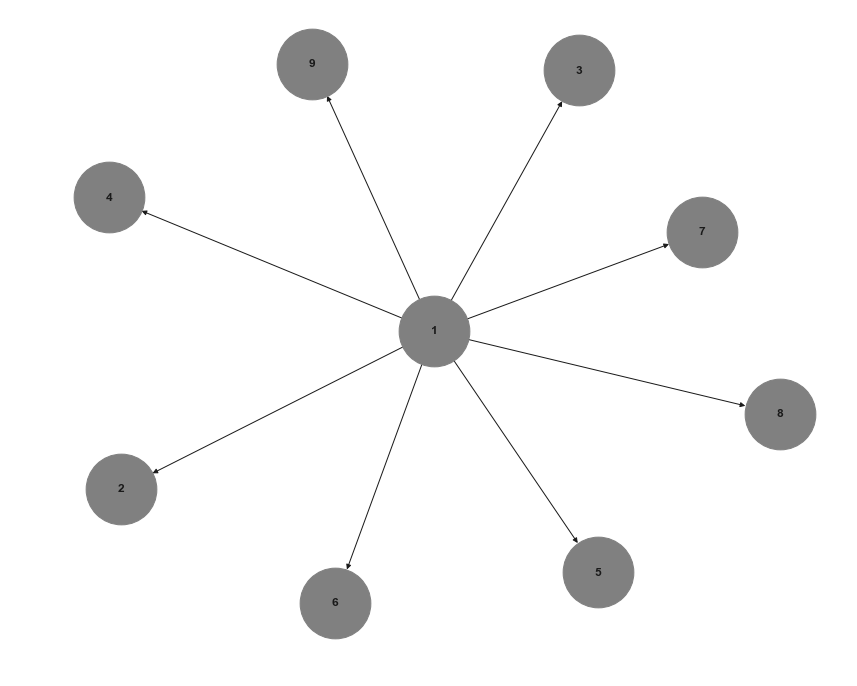

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(32,12)})

plt.subplot(121)
nx.draw(DG, with_labels=True, font_weight='bold', node_size=5000, node_color='grey')
#plt.subplot(122)
plt.show()